<a href="https://colab.research.google.com/github/gratefullee/AgeGenderClassification/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import os
import glob
import shutil
import math

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import tensorflow.keras,os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [ ]:
cd drive/MyDrive/capstone3/

/content/drive/MyDrive/capstone3


## Gender Classification (VGG16)

In [ ]:
traindata = ImageDataGenerator().flow_from_directory(directory="data/f2/gender/train",target_size=(224,224))
testdata = ImageDataGenerator().flow_from_directory(directory="data/f2/gender/test", target_size=(224,224), batch_size= 2621)
valdata= ImageDataGenerator().flow_from_directory(directory="data/f2/gender/validation", target_size=(224,224), batch_size= 6)

Found 12222 images belonging to 2 classes.
Found 2621 images belonging to 2 classes.
Found 2609 images belonging to 2 classes.


In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [ ]:
Dir_Class_Model = Sequential()
for layer in vgg16_model.layers[:-1]:
    Dir_Class_Model.add(layer)

In [ ]:
for layer in Dir_Class_Model.layers[:-1]:
    layer.trainable = False

In [ ]:
num_classes = 2
Dir_Class_Model.add(Dense(num_classes, activation='softmax'))

In [ ]:
Dir_Class_Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)

In [ ]:
Dir_Class_Model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Dir_Class_Model.fit(traindata, epochs=10, verbose=1, validation_data=valdata)

Epoch 1/10
382/382 [==============================] - 1375s 4s/step - loss: 0.8191 - accuracy: 0.7272 - val_loss: 0.3888 - val_accuracy: 0.8283
Epoch 2/10
382/382 [==============================] - 83s 216ms/step - loss: 0.3144 - accuracy: 0.8612 - val_loss: 0.4577 - val_accuracy: 0.8015
Epoch 3/10
382/382 [==============================] - 83s 219ms/step - loss: 0.2320 - accuracy: 0.9053 - val_loss: 0.3226 - val_accuracy: 0.8593
Epoch 4/10
382/382 [==============================] - 82s 214ms/step - loss: 0.1883 - accuracy: 0.9282 - val_loss: 0.3120 - val_accuracy: 0.8632
Epoch 5/10
382/382 [==============================] - 82s 214ms/step - loss: 0.1544 - accuracy: 0.9496 - val_loss: 0.3441 - val_accuracy: 0.8578
Epoch 6/10
382/382 [==============================] - 80s 209ms/step - loss: 0.1218 - accuracy: 0.9698 - val_loss: 0.3028 - val_accuracy: 0.8766
Epoch 7/10
382/382 [==============================] - 81s 211ms/step - loss: 0.1057 - accuracy: 0.9762 - val_loss: 0.3105 - val_acc

In [ ]:
Dir_Class_Model.save('model/gender_class.h5')

In [ ]:
#mkdir model

In [ ]:
#Dir_Class_Model.save('model/gender.h5')

In [ ]:
#test out
gender = tf.keras.models.load_model('model/gender_class.h5')

In [ ]:
test_labels = testdata.labels

In [ ]:
test_imgs, test_labels = next(testdata)

In [ ]:
len(test_imgs)

2621

In [ ]:
#Y_pred = Dir_Class_Model.predict_generator(testdata)
Y_pred = gender.predict_generator(test_imgs)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
y_test = np.argmax(test_labels, axis=1)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
labels = [0,1]

In [ ]:
cm

array([[1291,  139],
       [ 177, 1014]])

In [ ]:
(1291+1014)/(cm.sum())

0.8794353300267074

Text(0.5, 1.0, 'Accuracy: 87.94%, Precision: 87.71%, Recall: 87.94%, F-1 Score: 87.81% \n(2621 Test Values)')

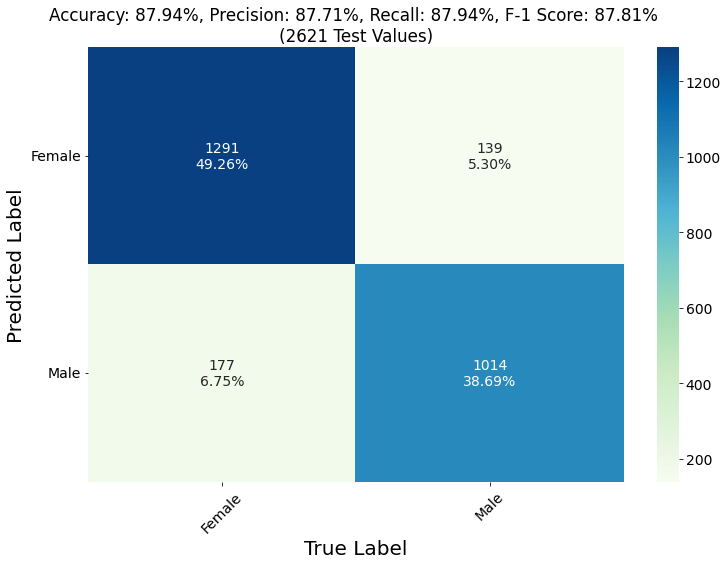

In [ ]:
# precison  = cm[0][0]/(cm[0][0] +cm[1][0])
# recall = cm[0][0]/(cm[0][0] +cm[0][1])
# f1 = ((2*precision*recall)/(precision+recall))
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test, labels=labels, average = 'macro')
recall = recall_score(y_pred, y_test, labels=labels, average = 'macro')
f1 = f1_score(y_pred, y_test, labels=labels, average = 'macro')
group_counts = ["{0:0.0f}\n".format(value) for value in cm .flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm .flatten()/np.sum(cm)]
box_labels = [f"{v1}{v2}".strip() for v1, v2 in zip(group_counts,group_percentages)]
box_labels = np.asarray(box_labels).reshape(cm .shape[0],cm .shape[1])
plt.figure(figsize = (12, 8)) #figsize = (24, 16)
plt.rcParams['font.size'] = 14
sns.heatmap(cm , annot=box_labels, fmt='', cmap='GnBu',xticklabels=['Female', 'Male'],yticklabels=['Female', 'Male'])
plt.yticks(rotation = 0, va = 'center')
plt.xticks(rotation = 45, ha = 'center')
plt.xlabel('True Label', FontSize = 20)
plt.ylabel('Predicted Label', FontSize = 20)
plt.title('Accuracy: {:.2%}, Precision: {:.2%}, Recall: {:.2%}, F-1 Score: {:.2%} \n({} Test Values)'.format(accuracy,precision, recall, f1, len(y_test)))
#plt.savefig('img/cm_gender.jpg')

In [ ]:
label_class = ['female','male']

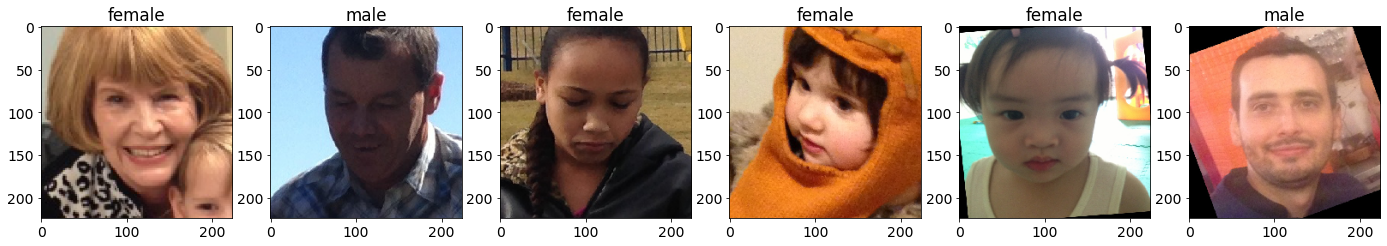

In [ ]:
fig, ax = plt.subplots(1, 6, figsize = (24,12))

for i in range(6):
    ax[i].imshow(test_imgs[i]/255)
    ax[i].set_title(label_class[np.argmax(test_labels[i])])
#plt.savefig('img/gender_examples.jpg')

In [ ]:
weights = gender.get_weights()

In [ ]:
np.argmax(gender.predict(np.expand_dims(test_imgs[4],axis=0)))

1

## Age Classification

In [ ]:
traindata = ImageDataGenerator().flow_from_directory(directory="data/f2/age/train",target_size=(224,224))
testdata = ImageDataGenerator().flow_from_directory(directory="data/f2/age/test", target_size=(224,224),batch_size=2793)
valdata = ImageDataGenerator().flow_from_directory(directory="data/f2/age/validation",target_size=(224,224))

Found 13035 images belonging to 8 classes.
Found 2793 images belonging to 8 classes.
Found 2794 images belonging to 8 classes.


In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [ ]:
Age_Class_Model = Sequential()
for layer in vgg16_model.layers[:-1]:
    Age_Class_Model.add(layer)

In [ ]:
for layer in Age_Class_Model.layers[:-1]:
    layer.trainable = False

In [ ]:
num_classes = 8
Age_Class_Model.add(Dense(num_classes, activation='softmax'))

In [ ]:
Age_Class_Model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
Age_Class_Model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
Age_Class_Model.fit(traindata, epochs=10, verbose=1, validation_data=valdata)

Epoch 1/10
408/408 [==============================] - 6140s 15s/step - loss: 2.8978 - accuracy: 0.4179 - val_loss: 1.2569 - val_accuracy: 0.4946
Epoch 2/10
408/408 [==============================] - 90s 220ms/step - loss: 0.9318 - accuracy: 0.6544 - val_loss: 1.1343 - val_accuracy: 0.5827
Epoch 3/10
408/408 [==============================] - 87s 213ms/step - loss: 0.6377 - accuracy: 0.7807 - val_loss: 1.0729 - val_accuracy: 0.6056
Epoch 4/10
408/408 [==============================] - 85s 208ms/step - loss: 0.4151 - accuracy: 0.8680 - val_loss: 1.0710 - val_accuracy: 0.6296
Epoch 5/10
408/408 [==============================] - 88s 215ms/step - loss: 0.2387 - accuracy: 0.9354 - val_loss: 1.0651 - val_accuracy: 0.6496
Epoch 6/10
408/408 [==============================] - 88s 215ms/step - loss: 0.1242 - accuracy: 0.9793 - val_loss: 1.1109 - val_accuracy: 0.6518
Epoch 7/10
408/408 [==============================] - 87s 213ms/step - loss: 0.0655 - accuracy: 0.9951 - val_loss: 1.1217 - val_ac

In [ ]:
Age_Class_Model.save('model/age_class.h5')

In [ ]:
age = tf.keras.models.load_model('model/age_class.h5')

In [ ]:
test_imgs, test_labels = next(testdata)

In [ ]:
type(test_imgs), type(test_labels)

(numpy.ndarray, numpy.ndarray)

In [ ]:
len(test_imgs)

2793

In [ ]:
Y_pred = age.predict_generator(test_imgs)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
y_test = np.argmax(test_labels, axis=1)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
labels =  [f for f in os.listdir('data/f2/age/train')][1:]

In [ ]:
cm

array([[328,   0,   7,   1,  38,   0,   0,   3],
       [  5, 130,  83,  18,  12,   5,   1,  18],
       [  7,  31, 612,  64,  12,   8,   9,  51],
       [  1,  12, 120, 237,   3,  13,  10,  20],
       [ 49,   9,   6,   3, 198,   2,   0,  32],
       [  0,   4,  39,  21,   0,  52,  14,   7],
       [  0,   3,  23,  16,   1,  12,  91,   1],
       [  9,  15,  55,  16,  40,   1,   2, 213]])

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Us

Text(0.5, 1.0, 'Accuracy: 66.63%, Precision: 0.00%, Recall: 0.00%, F-1 Score: 0.00% \n(2793 Test Values)')

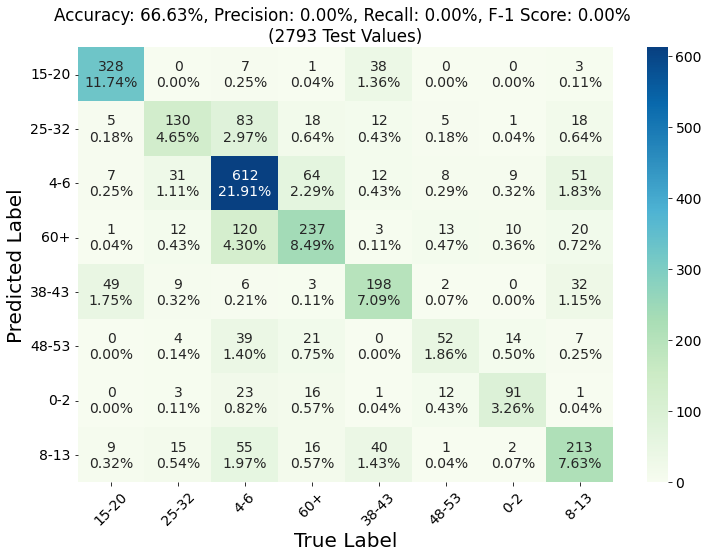

In [ ]:
# precison  = cm[0][0]/(cm[0][0] +cm[1][0])
# recall = cm[0][0]/(cm[0][0] +cm[0][1])
# f1 = ((2*precision*recall)/(precision+recall))
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test, labels=labels, average = 'macro')
recall = recall_score(y_pred, y_test, labels=labels, average = 'macro')
f1 = f1_score(y_pred, y_test, labels=labels, average = 'macro')
group_counts = ["{0:0.0f}\n".format(value) for value in cm .flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm .flatten()/np.sum(cm)]
box_labels = [f"{v1}{v2}".strip() for v1, v2 in zip(group_counts,group_percentages)]
box_labels = np.asarray(box_labels).reshape(cm .shape[0],cm .shape[1])
plt.figure(figsize = (12, 8)) #figsize = (24, 16)
plt.rcParams['font.size'] = 14
sns.heatmap(cm , annot=box_labels, fmt='', cmap='GnBu',xticklabels=labels,yticklabels=labels)
plt.yticks(rotation = 0, va = 'center')
plt.xticks(rotation = 45, ha = 'center')
plt.xlabel('True Label', FontSize = 20)
plt.ylabel('Predicted Label', FontSize = 20)
plt.title('Accuracy: {:.2%}, Precision: {:.2%}, Recall: {:.2%}, F-1 Score: {:.2%} \n({} Test Values)'.format(accuracy,precision, recall, f1, len(y_test)))
#plt.savefig('img/cm_age.jpg')

In [ ]:
precision

0.0

In [ ]:
label_class = [f for f in os.listdir('data/f2/age/train')]

In [ ]:
label_class = label_class[1:]

In [ ]:
label_class

['15-20', '25-32', '4-6', '60+', '38-43', '48-53', '0-2', '8-13']

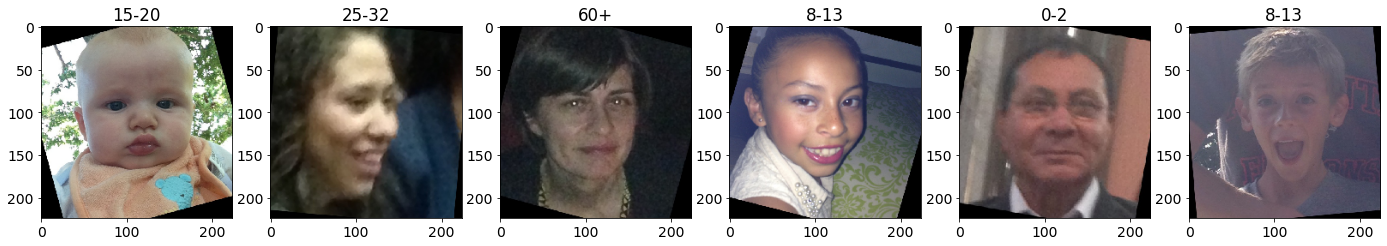

In [ ]:
fig, ax = plt.subplots(1, 6, figsize = (24,12))

for i in range(6):
    ax[i].imshow(test_imgs[i]/255)
    ax[i].set_title(label_class[np.argmax(test_labels[i])])

plt.savefig('img/age_examples.jpg')

## Face Detection

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [ ]:
#img = cv2.VideoCapture(0)
img = cv2.imread('data/f2/age/train/25-32/26.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)


for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

        
# cv2.imshow("Faces found", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


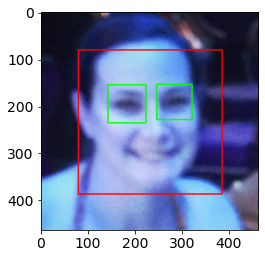

In [ ]:
plt.imshow(img)